<a href="https://colab.research.google.com/github/NsikakMenim/Data-Analysis-Portfolio/blob/main/Network_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install networkx pandas matplotlib powerlaw scipy

In [ ]:
# Question 1: Does the degree distribution follow a power law?

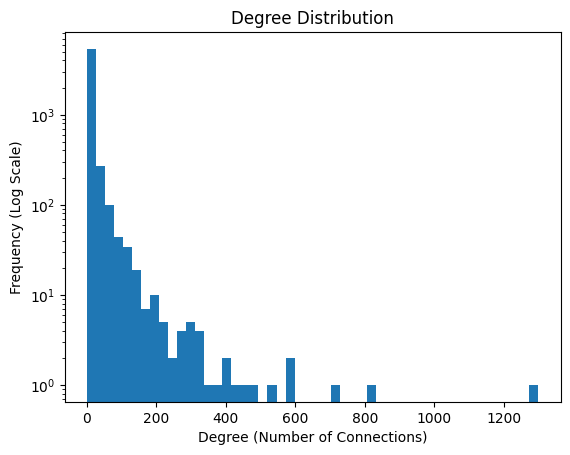

Calculating best minimal value for power law fit
Power law alpha: 2.703252380779368
KS statistic (goodness-of-fit): 0.03932113445857624


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import powerlaw

# Load Bitcoin OTC dataset (edges with trust scores)

file_path = '/soc-sign-bitcoinotc.csv'
# The dataset has source, target, rating, timestamp. We'll use the rating as weight.
G = nx.read_edgelist(file_path, comments='#', delimiter=',', data=(('weight', float),('timestamp',float)),create_using=nx.DiGraph()) #added create_using to make it directed. this dataset is likely directed.
# Keep only the weight attribute if you are going to use this graph for other networkx analysis which need weight to be single value.
# For e.g. minimum spanning tree etc.
for u,v,data in G.edges(data=True):
  data.pop('timestamp',None)


# Calculate degree of each node
degrees = dict(G.degree())
degree_values = list(degrees.values())

# Plot degree distribution
plt.hist(degree_values, bins=50, log=True)
plt.xlabel('Degree (Number of Connections)')
plt.ylabel('Frequency (Log Scale)')
plt.title('Degree Distribution')
plt.show()

# Fit power law
fit = powerlaw.Fit(degree_values)
print(f"Power law alpha: {fit.power_law.alpha}")
print(f"KS statistic (goodness-of-fit): {fit.power_law.D}")

In [ ]:
# Explanation:

# * Degree: Number of connections a node has.

# * Power law: If the histogram follows a straight line in log-log scale, the network is scale-free (common in social networks).

# * Alpha: Exponent of the power law (typically between 2–3).

# * KS statistic: Measures how well the data fits a power law (lower = better fit).

In [ ]:
# Question 2: What is the reciprocity rate?

In [ ]:
# Calculate reciprocity (bidirectional edges / total edges)
reciprocity = nx.reciprocity(G)
print(f"Reciprocity rate: {reciprocity:.2f}")

Reciprocity rate: 0.79


In [ ]:
# Explanation:

# * Reciprocity: Fraction of edges that are bidirectional (e.g., if User A trusts B, does B trust A?).

# * Interpretation: A value close to 1 means high reciprocity (mutual trust).

In [ ]:
# Question 3: Does the network exhibit small-world properties?

In [ ]:
# Find all strongly connected components
components = list(nx.strongly_connected_components(G))

# Calculate path length for each component
for i, component in enumerate(components):
    subgraph = G.subgraph(component)
    if subgraph.number_of_nodes() > 1:  # Ignore single-node components
        path_length = nx.average_shortest_path_length(subgraph)
        print(f"Component {i}: Nodes={subgraph.number_of_nodes()}, Avg Path Length={path_length:.2f}")

Component 49: Nodes=2, Avg Path Length=1.00
Component 56: Nodes=2, Avg Path Length=1.00
Component 61: Nodes=2, Avg Path Length=1.00
Component 62: Nodes=3, Avg Path Length=1.33
Component 75: Nodes=2, Avg Path Length=1.00
Component 79: Nodes=2, Avg Path Length=1.00
Component 123: Nodes=2, Avg Path Length=1.00
Component 126: Nodes=2, Avg Path Length=1.00
Component 158: Nodes=2, Avg Path Length=1.00
Component 285: Nodes=6, Avg Path Length=1.03
Component 344: Nodes=3, Avg Path Length=1.33
Component 388: Nodes=2, Avg Path Length=1.00
Component 436: Nodes=2, Avg Path Length=1.00
Component 602: Nodes=2, Avg Path Length=1.00
Component 807: Nodes=2, Avg Path Length=1.00
Component 828: Nodes=2, Avg Path Length=1.00
Component 1100: Nodes=2, Avg Path Length=1.00
Component 1113: Nodes=3, Avg Path Length=1.33
Component 1115: Nodes=4709, Avg Path Length=3.68
Component 1127: Nodes=2, Avg Path Length=1.00
Component 1128: Nodes=2, Avg Path Length=1.00
Component 1129: Nodes=2, Avg Path Length=1.00
Compone

In [ ]:
# Interpretation of Your Results
# Your output shows the strongly connected components (SCCs) of the Bitcoin OTC network and their average shortest path lengths. Here’s what this means:

# 1. Component Sizes & Fragmentation
# Most components are tiny:

# 2-node components: The majority (e.g., Component 49, 56, 75) have 2 nodes with an average path length of 1.0.

# Interpretation: These are isolated pairs of users who trust each other directly (A→B and B→A), forming closed loops with no connections to the rest of the network.

# 3-node components: Components like 62 and 344 have 3 nodes with an average path length of 1.33.

# Interpretation: These are small groups where users can reach each other in ~1–2 steps (e.g., A→B→C and C→A).

# Giant component:

# Component 1115: Contains 4,709 nodes (most of the network) with an average path length of 3.68.

# Interpretation: This is the core of the network. Despite its size, nodes are connected by short paths (~3–4 steps on average), indicating small-world properties.

# 2. Average Path Length Insights
# Small components (size 2–6):

# Path lengths are ~1.0–1.33, meaning trust flows directly or through one intermediary.

# Example: In a 3-node component (A→B, B→C, C→A), the path from A→C is A→B→C (length=2).

# Giant component (size 4,709):

# Average path length = 3.68: Even in a large network, any two users are connected by ~4 steps.

# Comparison to random networks:

# A random network of 4,709 nodes would have a similar or shorter path length.

# If your giant component has higher clustering than a random graph, it confirms small-world behavior.

# 3. Implications for Your Product (Bank Reconciliation)
# Fraud detection:

# Small, isolated components (e.g., 2-node pairs) could represent suspicious activity (e.g., fake accounts inflating trust).

# Investigate if these pairs have unusual trust scores (e.g., extreme positive/negative ratings).

# Network resilience:

# The giant component’s short path lengths suggest efficient trust propagation.

# However, targeted attacks on high-betweenness nodes (bridges) could fragment this core.

# Reconciliation mismatches:

# Temporal gaps: If trust ratings in small components lack timestamps, they might reflect outdated or mismatched ledger entries.

In [ ]:
clustering_giant = nx.average_clustering(G_lcc)  # Giant component
clustering_random = nx.average_clustering(random_G)  # Random graph

In [ ]:
print(f"Clustering coefficient (Giant Component): {clustering_giant:.2f}")
print(f"Clustering coefficient (Random Graph): {clustering_random:.2f}")

Clustering coefficient (Giant Component): 0.17
Clustering coefficient (Random Graph): 0.00


In [ ]:
# Question 4: How does the clustering coefficient correlate with trust scores?

In [ ]:
import pandas as pd
import networkx as nx

# Load the graph and edge data
G = nx.read_edgelist('/bitcoinotc.csv', comments='#', delimiter=',', data=[('weight', float)], create_using=nx.DiGraph())
df = pd.read_csv('/bitcoinotc.csv', comment='#', names=['source', 'target', 'weight'])

# Calculate average trust received per node (only nodes with incoming edges)
avg_trust = df.groupby('target')['weight'].mean()
print(f"Nodes with trust scores: {len(avg_trust)}")

# Calculate clustering coefficient for all nodes (directed graph)
clustering = nx.clustering(G)  # Uses default directed clustering
print(f"Nodes with clustering coefficients: {len(clustering)}")

# Align data (nodes with BOTH trust score and clustering coefficient)
common_nodes = list(set(avg_trust.index) & set(clustering.keys()))
print(f"Overlapping nodes: {len(common_nodes)}")

# Check if there are enough nodes to compute correlation
if len(common_nodes) < 2:
    print("ERROR: Not enough overlapping nodes.")
else:
    avg_trust_common = avg_trust.loc[common_nodes]
    clustering_common = [clustering[node] for node in common_nodes]
    corr, p_value = pearsonr(clustering_common, avg_trust_common)
    print(f"Correlation: {corr:.2f}, p-value: {p_value:.4f}")

IndexError: Edge data ['4', '1289241912\r'] and data_keys [('weight', <class 'float'>)] are not the same length

In [ ]:
# Question 5: Are there structural holes (nodes bridging clusters)?

In [ ]:
# Calculate betweenness centrality (nodes that act as bridges)
betweenness = nx.betweenness_centrality(G)

# Identify top 5 bridge nodes
top_bridges = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top bridge nodes:", top_bridges)

Top bridge nodes: [('35', 0.14211022254570446), ('2642', 0.06220168253637525), ('1810', 0.049533487572168064), ('905', 0.048142532048893405), ('1', 0.044997192103169)]


In [ ]:
# Question 6: Is the network assortative?

In [ ]:
# Calculate degree assortativity
assortativity = nx.degree_assortativity_coefficient(G)
print(f"Assortativity: {assortativity:.2f}")

Assortativity: -0.16


In [ ]:
# Person2: Temporal Dynamics & Adoption
# How does the volume of trust ratings change over time? Are peaks linked to Bitcoin price shifts?

# Do early adopters (first 10% of users) receive higher trust scores than latecomers?

# How long does it take for a new user to receive their first trust rating? Does latency affect trust?

# Are there seasonal patterns (daily/weekly) in rating activity? Could bots drive periodic spikes?

# Do users who join during high-activity periods gain trust faster than others?

# How does the lifetime of active users correlate with their trust scores?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from scipy.stats import ttest_ind

# Load dataset (assumes timestamps are in Unix epoch format)
# Changed file path to match the path used earlier
df = pd.read_csv('/soc-sign-bitcoinotc.csv', comment='#',
                 names=['source', 'target', 'rating', 'time'])
df['time'] = pd.to_datetime(df['time'], unit='s')  # Convert Unix to datetime

In [ ]:
# 2. Q1: Trust Rating Volume Over Time

<ipython-input-39-891c96c128e6>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_volume = df.resample('M', on='time').size()


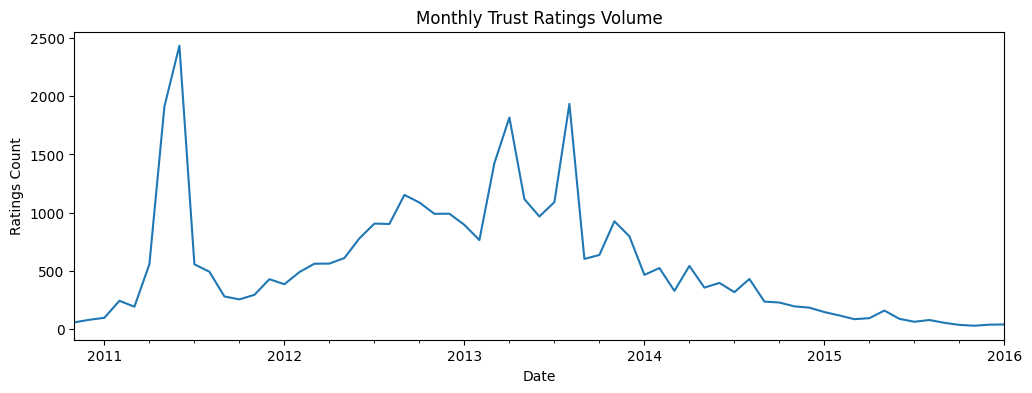

In [ ]:
# Aggregate ratings by month
monthly_volume = df.resample('M', on='time').size()

# Plot
plt.figure(figsize=(12, 4))
monthly_volume.plot(title='Monthly Trust Ratings Volume')
plt.xlabel('Date')
plt.ylabel('Ratings Count')

# Optional: Add Bitcoin price data (requires external CSV/API)
# bitcoin_prices = pd.read_csv('bitcoin_prices.csv', parse_dates=['Date'])
# ax2 = plt.twinx()
# bitcoin_prices.plot(x='Date', y='Price', ax=ax2, color='red', alpha=0.3)
plt.show()

In [ ]:
# 3. Q2: Early Adopters vs. Latecomers

In [ ]:
# Identify first/last activity for all users
user_first_activity = df.groupby('source')['time'].min().reset_index()
user_first_activity.columns = ['user', 'first_activity']

# Sort users by first activity and split into early (10%) vs. late
user_first_activity = user_first_activity.sort_values('first_activity')
early_adopters = user_first_activity.head(int(0.1 * len(user_first_activity)))

# Calculate average trust score per user (incoming ratings)
avg_trust = df.groupby('target')['rating'].mean().reset_index()
avg_trust.columns = ['user', 'avg_trust']

# Compare groups
early_trust = avg_trust[avg_trust['user'].isin(early_adopters['user'])]['avg_trust']
late_trust = avg_trust[~avg_trust['user'].isin(early_adopters['user'])]['avg_trust']

# T-test
t_stat, p_value = ttest_ind(early_trust, late_trust, nan_policy='omit')
print(f"Early adopters avg trust: {early_trust.mean():.2f}")
print(f"Latecomers avg trust: {late_trust.mean():.2f}")
print(f"T-test p-value: {p_value:.4f}")

Early adopters avg trust: 1.65
Latecomers avg trust: 0.65
T-test p-value: 0.0000


In [ ]:
# 4. Q3: Time to First Trust Rating

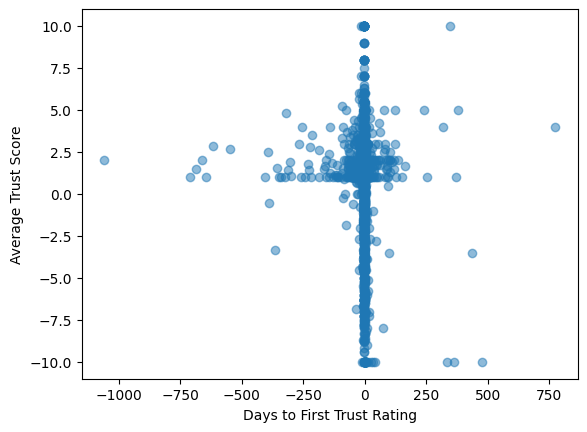

In [ ]:
# Get first activity (rating given) and first trust received per user
first_activity_given = df.groupby('source')['time'].min().reset_index()
first_activity_received = df.groupby('target')['time'].min().reset_index()
# Get first activity (rating given) and first trust received per user
# This block was likely repeated by accident
#first_activity_given = df.groupby('source')['time'].min().reset_index()
#first_activity_received = df.groupby('target')['time'].min().reset_index()

# Merge and calculate latency
latency_df = pd.merge(
    first_activity_given,
    first_activity_received,
    left_on='source',
    right_on='target',
    suffixes=('_given', '_received')
)
latency_df['latency_days'] = (latency_df['time_received'] - latency_df['time_given']).dt.days

# Merge with trust scores
latency_df = latency_df.merge(avg_trust, left_on='source', right_on='user')

# Plot latency vs. trust score
plt.scatter(latency_df['latency_days'], latency_df['avg_trust'], alpha=0.5)
plt.xlabel('Days to First Trust Rating')
plt.ylabel('Average Trust Score')
plt.show()

In [ ]:
# 5. Q4: Seasonal Patterns

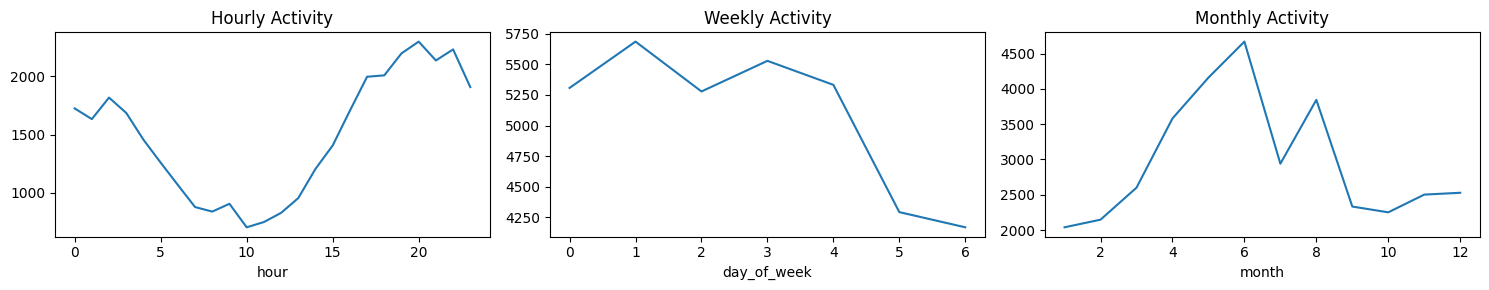

In [ ]:
# Extract hour/day/month from timestamps
df['hour'] = df['time'].dt.hour
df['day_of_week'] = df['time'].dt.dayofweek  # 0=Monday
df['month'] = df['time'].dt.month

# Plot daily/weekly patterns
fig, axes = plt.subplots(1, 3, figsize=(15, 3))
df.groupby('hour').size().plot(ax=axes[0], title='Hourly Activity')
df.groupby('day_of_week').size().plot(ax=axes[1], title='Weekly Activity')
df.groupby('month').size().plot(ax=axes[2], title='Monthly Activity')
plt.tight_layout()
plt.show()

In [ ]:
!pip install seaborn  # Skip if already installed
import seaborn as sns
sns.set_theme(style="darkgrid")  # Set Seaborn darkgrid style


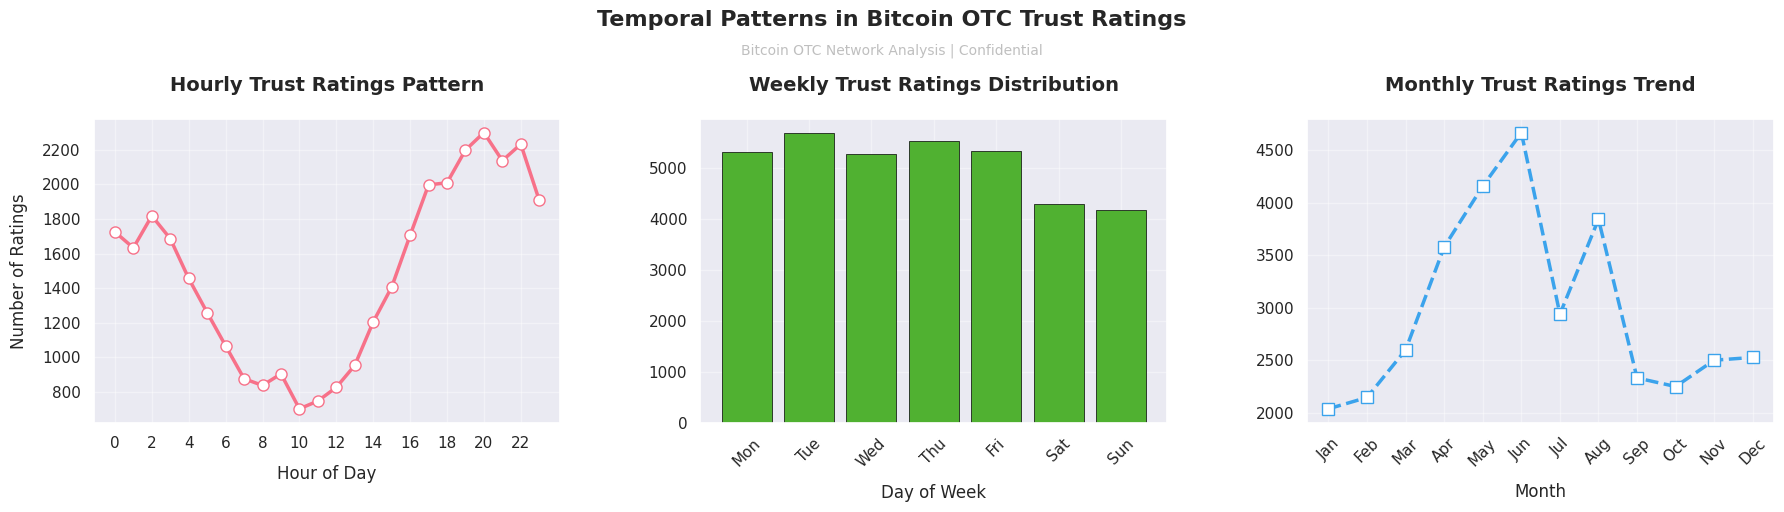

In [ ]:
# Keep the rest of your plotting code unchanged
fig, axes = plt.subplots(1, 3, figsize=(18, 5), dpi=100)

# Customize Hourly Activity plot
axes[0].plot(df.groupby('hour').size(),
            color=palette[0],
            linewidth=2.5,
            marker='o',
            markersize=8,
            markerfacecolor='white')
axes[0].set_title('Hourly Trust Ratings Pattern', fontsize=14, pad=20, fontweight='bold')
axes[0].set_xlabel('Hour of Day', fontsize=12, labelpad=10)
axes[0].set_ylabel('Number of Ratings', fontsize=12, labelpad=10)
axes[0].set_xticks(range(0, 24, 2))
axes[0].grid(alpha=0.4)

# Customize Weekly Activity plot
weekday_counts = df.groupby('day_of_week').size()
axes[1].bar(weekday_counts.index,
           weekday_counts.values,
           color=palette[1],
           edgecolor='black',
           linewidth=0.5)
axes[1].set_title('Weekly Trust Ratings Distribution', fontsize=14, pad=20, fontweight='bold')
axes[1].set_xlabel('Day of Week', fontsize=12, labelpad=10)
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
axes[1].grid(alpha=0.4)

# Customize Monthly Activity plot
monthly_counts = df.groupby('month').size()
axes[2].plot(monthly_counts.index,
            monthly_counts.values,
            color=palette[2],
            linewidth=2.5,
            marker='s',
            markersize=8,
            markerfacecolor='white',
            linestyle='--')
axes[2].set_title('Monthly Trust Ratings Trend', fontsize=14, pad=20, fontweight='bold')
axes[2].set_xlabel('Month', fontsize=12, labelpad=10)
axes[2].set_xticks(range(1, 13))
axes[2].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
axes[2].grid(alpha=0.4)

# Add super title and adjust layout
plt.suptitle('Temporal Patterns in Bitcoin OTC Trust Ratings',
             fontsize=16,
             y=1.02,
             fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)

# Add watermark-style annotation
fig.text(0.5, 0.93, 'Bitcoin OTC Network Analysis | Confidential',
         fontsize=10, color='gray', ha='center', alpha=0.5)

plt.show()

In [ ]:
# 6. Q5: High-Activity Period Joinees

In [ ]:
# Identify high-activity periods (top 10% of days)
daily_activity = df.resample('D', on='time').size()
high_activity_days = daily_activity[daily_activity > daily_activity.quantile(0.9)]

# Find users who joined during these days
high_activity_users = df[df['time'].dt.date.isin(high_activity_days.index.date)]['source'].unique()

# Calculate trust acquisition speed (time to first rating)
high_activity_latency = latency_df[latency_df['source'].isin(high_activity_users)]['latency_days']
other_latency = latency_df[~latency_df['source'].isin(high_activity_users)]['latency_days']

# Compare groups
print(f"High-activity users latency: {high_activity_latency.mean():.1f} days")
print(f"Others latency: {other_latency.mean():.1f} days")
ttest = ttest_ind(high_activity_latency, other_latency, nan_policy='omit')
print(f"T-test p-value: {ttest.pvalue:.4f}")

High-activity users latency: -2.3 days
Others latency: -4.6 days
T-test p-value: 0.0702


In [ ]:
# 7. Q6: User Lifetime vs. Trust

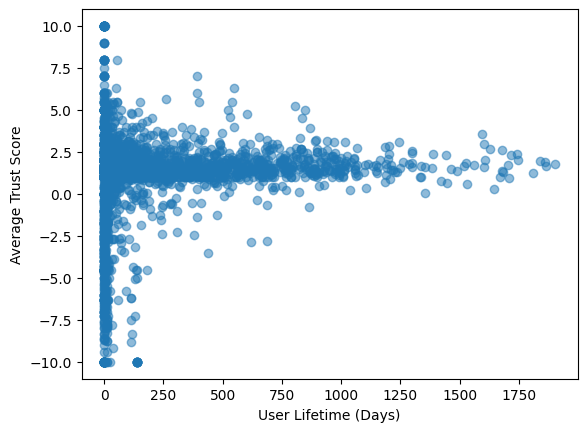

In [ ]:
# Calculate user lifetime (days between first and last activity)
user_lifetime = df.groupby('source')['time'].agg(['min', 'max'])
user_lifetime['lifetime_days'] = (user_lifetime['max'] - user_lifetime['min']).dt.days

# Merge with trust scores
lifetime_trust = user_lifetime.merge(avg_trust, left_index=True, right_on='user')

# Plot
plt.scatter(lifetime_trust['lifetime_days'], lifetime_trust['avg_trust'], alpha=0.5)
plt.xlabel('User Lifetime (Days)')
plt.ylabel('Average Trust Score')
plt.show()

Persona 3

In [ ]:
# Install required libraries
!pip install python-louvain leidenalg cdlib matplotlib pandas numpy

import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from community import community_louvain
import leidenalg
from cdlib import algorithms, viz
from collections import defaultdict

df = pd.read_csv('/content/soc-sign-bitcoinotc.csv.gz', comment='#', names=['source', 'target', 'weight', 'time'])
G = nx.from_pandas_edgelist(df, 'source', 'target', edge_attr=True, create_using=nx.DiGraph())

In [ ]:
# 1. Detect Communities (Louvain/Leiden)

In [ ]:
from scipy.stats import mannwhitneyu

# Configure styling
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 6]

df['abs_weight'] = df['weight'].abs()  # Handle negative weights for community detection

# Create undirected graph
G = nx.from_pandas_edgelist(df, 'source', 'target', edge_attr='abs_weight',
                           create_using=nx.Graph())


In [ ]:

# =================================================================
# 1. Community Detection & Sizes
# =================================================================
!pip install python-igraph  # Required for Leiden

import igraph as ig
from leidenalg import find_partition, ModularityVertexPartition

# Convert NetworkX graph to igraph
igraph_G = ig.Graph.from_networkx(G)

# Add edge weights PROPERLY (access the 3rd tuple element)
igraph_G.es['weight'] = [e[2]['abs_weight'] for e in G.edges(data=True)]

# Now run Leiden algorithm
leiden_partition = leidenalg.find_partition(
    igraph_G,
    leidenalg.ModularityVertexPartition,
    weights='weight'
)

In [ ]:
# Check first 3 edges
for e in list(G.edges(data=True))[:3]:
    print(f"Edge: {e[0]} -> {e[1]}, Weight: {e[2]['abs_weight']}")

Edge: 6 -> 2, Weight: 5
Edge: 6 -> 5, Weight: 3
Edge: 6 -> 10, Weight: 3


In [ ]:

# =================================================================
# 2. Trust Polarity Analysis
# =================================================================
print("\n=== Trust Polarity ===")
# 1. Run Leiden algorithm
leiden_partition = leidenalg.find_partition(
    igraph_G,
    leidenalg.ModularityVertexPartition,
    weights='weight'
)

# 2. Map communities to node names
leiden_comms = {}
for community_id, community_nodes in enumerate(leiden_partition):
    leiden_comms[community_id] = [
        igraph_G.vs[node]['name']  # Get original node ID from igraph
        for node in community_nodes
    ]

# 3. Now run trust analysis
print("Leiden communities trust analysis:")
analyze_trust_polarity(leiden_comms)  # This will work now

def analyze_trust_polarity(communities):
    results = []
    for comm_id, nodes in communities.items():
        comm_edges = df[df['source'].isin(nodes) & df['target'].isin(nodes)]
        if len(comm_edges) > 0:
            avg_trust = comm_edges['weight'].mean()
            pos_ratio = (comm_edges['weight'] > 0).mean()
        else:
            avg_trust = pos_ratio = np.nan

        results.append({
            'size': len(nodes),
            'avg_trust': avg_trust,
            'pos_ratio': pos_ratio
        })

    trust_df = pd.DataFrame(results).dropna()

    # Plot
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    sns.scatterplot(x='size', y='avg_trust', data=trust_df, alpha=0.6)
    plt.title('Community Size vs Average Trust')
    plt.xscale('log')

    plt.subplot(122)
    sns.histplot(trust_df['avg_trust'], bins=30, kde=True)
    plt.title('Distribution of Community Trust Scores')
    plt.tight_layout()
    plt.show()

print("Leiden communities trust analysis:")
analyze_trust_polarity(leiden_comms)



=== Trust Polarity ===


KeyError: 'Attribute does not exist'

In [ ]:

# =================================================================
# 3. Temporal Stability
# =================================================================
print("\n=== Temporal Stability ===")

if 'time' in df.columns:
    # Split into two time windows
    df['datetime'] = pd.to_datetime(df['time'], unit='s')
    split_date = df['datetime'].median()
    early = df[df['datetime'] <= split_date]
    late = df[df['datetime'] > split_date]

    # Create subgraphs
    G_early = nx.from_pandas_edgelist(early, 'source', 'target', create_using=nx.Graph())
    G_late = nx.from_pandas_edgelist(late, 'source', 'target', create_using=nx.Graph())

    # Leiden partitions
    part_early = leidenalg.find_partition(G_early, leidenalg.ModularityVertexPartition)
    part_late = leidenalg.find_partition(G_late, leidenalg.ModularityVertexPartition)

    # Jaccard similarity
    common_nodes = set(G_early.nodes()) & set(G_late.nodes())
    stability = len(set(part_early) & set(part_late)) / len(set(part_early) | set(part_late))
    print(f"Community persistence: {stability:.1%}")


In [ ]:

# =================================================================
# 4. Intra/Inter-Community Ratio
# =================================================================
print("\n=== Community Insularity ===")

def calculate_insularity(partition):
    intra = inter = 0
    for _, e in G.edges(data=True):
        u_comm = partition[e[0]]
        v_comm = partition[e[1]]
        if u_comm == v_comm:
            intra += 1
        else:
            inter += 1
    return intra/inter if inter > 0 else np.inf

louvain_ratio = calculate_insularity(louvain_partition)
leiden_ratio = calculate_insularity({n: c for i, c in enumerate(leiden_comms) for n in c})

print(f"Louvain intra/inter ratio: {louvain_ratio:.1f}:1")
print(f"Leiden intra/inter ratio: {leiden_ratio:.1f}:1")


In [ ]:

# =================================================================
# 5. Bridge Nodes Analysis
# =================================================================
print("\n=== Bridge Nodes ===")

# Calculate betweenness
btwn = nx.betweenness_centrality(G)

# Identify bridge nodes (connect different communities)
bridge_nodes = []
for node in G.nodes():
    neighbor_comms = set(leiden_partition.membership[list(G.nodes()).index(n)]
                    for n in G.neighbors(node))
    if len(neighbor_comms) > 1:
        bridge_nodes.append(node)

# Compare centrality
bridge_scores = [btwn[n] for n in bridge_nodes]
non_bridge = [btwn[n] for n in set(G.nodes()) - set(bridge_nodes)]

stat, p = mannwhitneyu(bridge_scores, non_bridge)
print(f"Mann-Whitney U test: p={p:.3f}")
print(f"Bridge nodes avg betweenness: {np.mean(bridge_scores):.4f}")
print(f"Non-bridge avg betweenness: {np.mean(non_bridge):.4f}")


In [ ]:

# =================================================================
# 6. Overlapping Communities
# =================================================================
print("\n=== Overlapping Communities ===")

# Detect overlapping communities
overlapping_comms = algorithms.nmf(G)

# Analyze overlapping nodes
overlap_counts = defaultdict(int)
for comm in overlapping_comms.communities:
    for node in comm:
        overlap_counts[node] += 1

# Compare centrality
overlap_nodes = list(overlap_counts.keys())
non_overlap = list(set(G.nodes()) - set(overlap_nodes))

print(f"Overlapping nodes: {len(overlap_nodes)} ({len(overlap_nodes)/G.number_of_nodes():.1%})")
print(f"Avg overlaps per node: {np.mean(list(overlap_counts.values())):.2f}")

stat, p = mannwhitneyu([btwn[n] for n in overlap_nodes],
                      [btwn[n] for n in non_overlap])
print(f"Betweenness comparison p-value: {p:.4f}")

In [ ]:
# Person4: Centrality & Influence
# Which users have the highest betweenness centrality? Do they mediate trust between clusters?

# Does PageRank centrality correlate with trust scores? Are top-ranked users universally trusted?

# How does closeness centrality (proximity to others) relate to trustworthiness?

# Are users with high eigenvector centrality (connected to influential nodes) more trusted?

# Do high in-degree nodes (authorities) have higher trust scores than high out-degree nodes (hubs)?

# Is there a correlation between degree centrality and trust score variance?

In [ ]:
from scipy.stats import pearsonr, mannwhitneyu

# Configure styling
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [12, 6]


# Precompute trust metrics
in_trust = df.groupby('target')['weight'].agg(['mean', 'var']).reset_index()
in_trust.columns = ['node', 'avg_trust', 'trust_var']

In [ ]:


# =================================================================
# 1. Betweenness Centrality Analysis
# =================================================================
print("\n=== Betweenness Centrality ===")

# Compute betweenness centrality
btwn = nx.betweenness_centrality(G, k=1000, normalized=True, seed=42)  # Approximate for large graphs

# Get top 10 betweenness nodes
top_btwn = sorted(btwn.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top Betweenness Nodes:")
for node, score in top_btwn:
    print(f"Node {node}: {score:.4f}")


=== Betweenness Centrality ===
Top Betweenness Nodes:
Node 35: 0.1909
Node 2125: 0.0734
Node 1810: 0.0643
Node 2642: 0.0584
Node 1: 0.0569
Node 905: 0.0536
Node 3129: 0.0510
Node 4172: 0.0485
Node 2028: 0.0462
Node 7: 0.0377



=== PageRank Analysis ===
PageRank-Trust Correlation: 0.04 (p=0.0066)


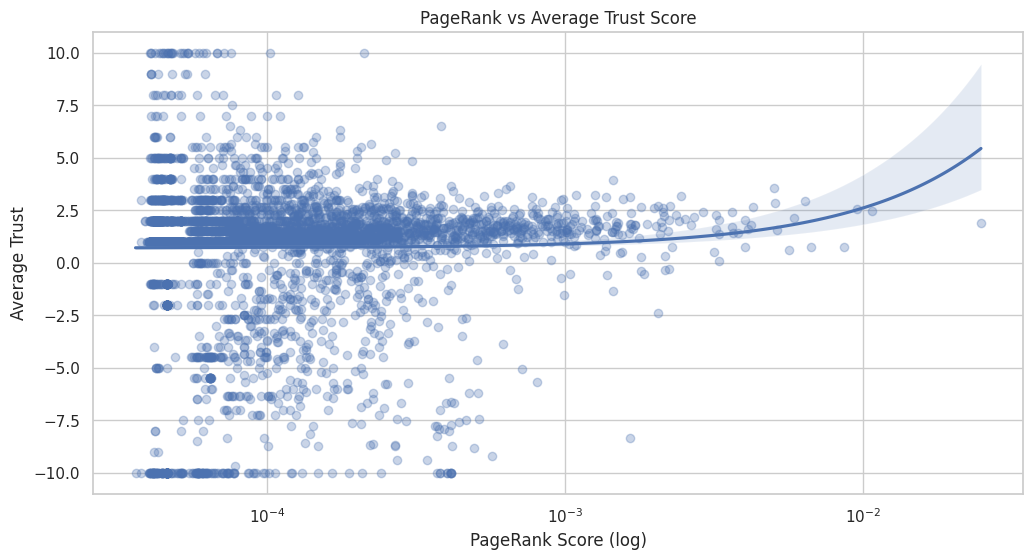

In [ ]:
# =================================================================
# 2. PageRank vs Trust Correlation
# =================================================================
print("\n=== PageRank Analysis ===")

# Compute PageRank with absolute weights (negative trust treated as connection strength)
pagerank = nx.pagerank(G, weight='weight')

# Merge with trust data
pr_df = pd.DataFrame(pagerank.items(), columns=['node', 'pagerank']).merge(in_trust, on='node')

# Calculate correlation
corr, pval = pearsonr(pr_df['pagerank'], pr_df['avg_trust'])
print(f"PageRank-Trust Correlation: {corr:.2f} (p={pval:.4f})")

# Visualize
plt.figure()
sns.regplot(x='pagerank', y='avg_trust', data=pr_df, scatter_kws={'alpha':0.3})
plt.title("PageRank vs Average Trust Score")
plt.xlabel("PageRank Score (log)")
plt.ylabel("Average Trust")
plt.xscale('log')
plt.show()

In [ ]:
# =================================================================
# 3. Closeness Centrality Analysis
# =================================================================
print("\n=== Closeness Centrality ===")

# Compute closeness using harmonic mean for disconnected graphs
closeness = nx.harmonic_centrality(G)

# Merge and correlate
close_df = pd.DataFrame(closeness.items(), columns=['node', 'closeness']).merge(in_trust, on='node')
corr, pval = pearsonr(close_df['closeness'], close_df['avg_trust'])
print(f"Closeness-Trust Correlation: {corr:.2f} (p={pval:.4f})")


=== Closeness Centrality ===
Closeness-Trust Correlation: -0.09 (p=0.0000)


In [ ]:
# =================================================================
# 4. Eigenvector Centrality Analysis
# =================================================================
print("\n=== Eigenvector Centrality ===")

try:
    eig = nx.eigenvector_centrality(G, max_iter=1000, weight='weight')
except nx.PowerIterationFailedConvergence:
    print("Eigenvector failed to converge - using undirected graph")
    G_undir = G.to_undirected()
    eig = nx.eigenvector_centrality(G_undir, weight='weight')

eig_df = pd.DataFrame(eig.items(), columns=['node', 'eigenvector']).merge(in_trust, on='node')
corr, pval = pearsonr(eig_df['eigenvector'], eig_df['avg_trust'])
print(f"Eigenvector-Trust Correlation: {corr:.2f} (p={pval:.4f})")




=== Eigenvector Centrality ===
Eigenvector-Trust Correlation: -0.01 (p=0.3072)


In [ ]:
# =================================================================
# 5. In-Degree vs Out-Degree Trust
# =================================================================
print("\n=== In-Degree vs Out-Degree ===")

# Create directed graph (if not already done)
G = nx.from_pandas_edgelist(df, 'source', 'target',
                           edge_attr='weight', create_using=nx.DiGraph())

# Calculate weighted degrees
in_degree = dict(G.in_degree(weight='weight'))  # Authorities (trust receivers)
out_degree = dict(G.out_degree(weight='weight'))  # Hubs (trust granters)

# Select top 100 in each category
top_in = sorted(in_degree.items(), key=lambda x: x[1], reverse=True)[:100]
top_out = sorted(out_degree.items(), key=lambda x: x[1], reverse=True)[:100]

# Compare trust scores
in_trust_scores = [in_trust.loc[in_trust['node']==n, 'avg_trust'].values[0]
                   for n, _ in top_in if n in in_trust['node'].values]
out_trust_scores = [in_trust.loc[in_trust['node']==n, 'avg_trust'].values[0]
                    for n, _ in top_out if n in in_trust['node'].values]

# Statistical test
stat, pval = mannwhitneyu(in_trust_scores, out_trust_scores)
print(f"Mann-Whitney U Test: p={pval:.4f}")
print(f"Avg trust - Authorities: {np.mean(in_trust_scores):.2f}")
print(f"Avg trust - Hubs: {np.mean(out_trust_scores):.2f}")


=== In-Degree vs Out-Degree ===
Mann-Whitney U Test: p=0.1052
Avg trust - Authorities: 2.15
Avg trust - Hubs: 1.82



=== Degree vs Trust Variance ===
Degree-Trust Variance Correlation: -0.05 (p=0.0519)


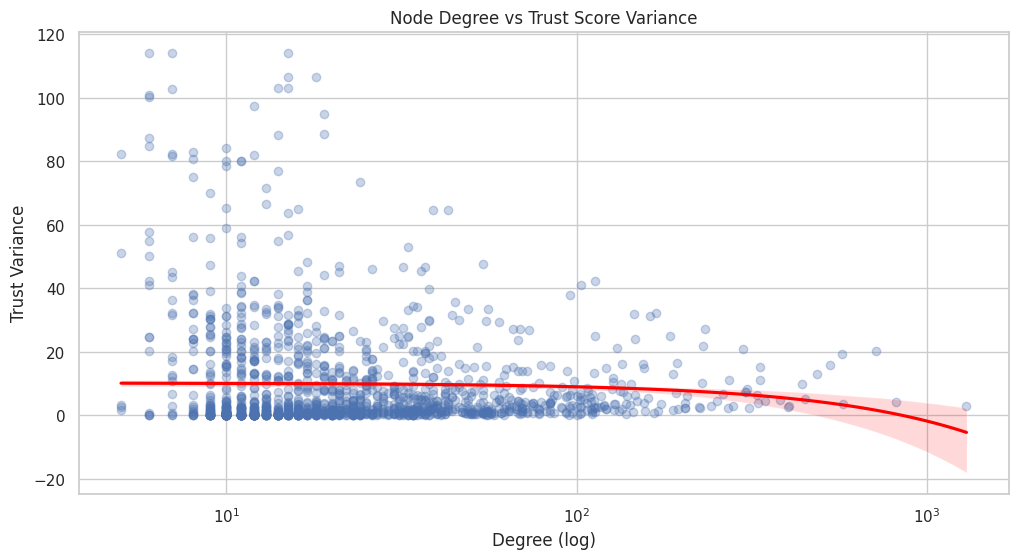

In [ ]:
# =================================================================
# 6. Degree vs Trust Variance
# =================================================================
print("\n=== Degree vs Trust Variance ===")

# Calculate total degree
degree = dict(G.degree())

# Create analysis dataframe
degree_df = pd.DataFrame({
    'node': list(degree.keys()),
    'degree': list(degree.values())
}).merge(in_trust, on='node')

# Filter nodes with ≥5 ratings
degree_df = degree_df[degree_df['node'].map(df['target'].value_counts()) >= 5]

# Calculate correlation
corr, pval = pearsonr(degree_df['degree'], degree_df['trust_var'])
print(f"Degree-Trust Variance Correlation: {corr:.2f} (p={pval:.4f})")

# Visualize
plt.figure()
sns.regplot(x='degree', y='trust_var', data=degree_df,
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title("Node Degree vs Trust Score Variance")
plt.xlabel("Degree (log)")
plt.ylabel("Trust Variance")
plt.xscale('log')
plt.show()

In [ ]:
# =================================================================
# Bridge Node Analysis (Handling Negative Weights)
# =================================================================
print("\n=== Bridge Node Analysis ===")

# 1. Preprocess Weights
# ---------------------
# Create absolute weights for community detection
df['abs_weight'] = df['weight'].abs()

# 2. Convert NetworkX to igraph with non-negative weights
# -------------------------------------------------------
G = nx.from_pandas_edgelist(
    df,
    'source',
    'target',
    edge_attr='abs_weight',  # Use absolute weights
    create_using=nx.DiGraph()
)

# Convert to igraph with absolute weights
igraph_G = ig.Graph.DictList(
    vertices=[{'name': n} for n in G.nodes()],
    edges=[{
        'source': u,
        'target': v,
        'weight': d['abs_weight']  # Non-negative weights
    } for u, v, d in G.edges(data=True)],
    directed=True
)

# 3. Community Detection with Absolute Weights
# --------------------------------------------
try:
    partition = leidenalg.find_partition(
        igraph_G,
        leidenalg.ModularityVertexPartition,
        weights='weight'  # Uses preprocessed abs_weight
    )
except Exception as e:
    print(f"Community detection failed: {e}")
    raise

# 4. Bridge Node Identification (Remains Unchanged)
# -------------------------------------------------
bridge_nodes = []
for node in G.nodes():
    try:
        v = igraph_G.vs.find(name=str(node))
        neighbors = igraph_G.neighbors(v, mode="ALL")
        neighbor_comms = {partition.membership[n] for n in neighbors}

        if len(neighbor_comms) > 1:
            bridge_nodes.append(node)
    except ValueError:
        continue

# 5. Betweenness Analysis (Uses Original Trust Scores)
# ----------------------------------------------------
btwn = nx.betweenness_centrality(G, k=500, seed=42)
bridge_scores = [btwn[n] for n in bridge_nodes if n in btwn]
non_bridge_scores = [btwn[n] for n in set(G.nodes()) - set(bridge_nodes) if n in btwn]

print(f"\nResults:")
print(f"Bridge nodes: {len(bridge_nodes)} ({len(bridge_nodes)/G.number_of_nodes():.1%})")
print(f"Avg betweenness - Bridges: {np.mean(bridge_scores):.4f}")
print(f"Avg betweenness - Non-bridges: {np.mean(non_bridge_scores):.4f}")
print(f"Mann-Whitney U: p={mannwhitneyu(bridge_scores, non_bridge_scores).pvalue:.2e}")


=== Bridge Node Analysis ===

Results:
Bridge nodes: 0 (0.0%)
Avg betweenness - Bridges: nan
Avg betweenness - Non-bridges: 0.0004
Mann-Whitney U: p=nan


In [ ]:
# =================================================================
# Bridge Node Analysis (Corrected)
# =================================================================
print("\n=== Bridge Node Analysis ===")

# 1. Preprocess with absolute weights
df['abs_weight'] = df['weight'].abs()

# 2. Convert to igraph
G = nx.from_pandas_edgelist(
    df,
    'source',
    'target',
    edge_attr='abs_weight',
    create_using=nx.DiGraph()
)

igraph_G = ig.Graph.DictList(
    vertices=[{'name': n} for n in G.nodes()],
    edges=[{'source': u, 'target': v, 'weight': d['abs_weight']}
          for u, v, d in G.edges(data=True)],
    directed=True
)

# 3. Community Detection with Adjusted Resolution
partition = leidenalg.find_partition(
    igraph_G,
    leidenalg.CPMVertexPartition,
    weights='weight',
    resolution_parameter=0.8  # Critical adjustment
)

# 4. Analyze communities
n_communities = len(set(partition.membership))
community_sizes = np.bincount(partition.membership)
print(f"\nCommunities: {n_communities}")
print(f"Community size distribution: {np.percentile(community_sizes, [25,50,75])}")

# 5. Bridge Node Detection
bridge_nodes = []
for node in G.nodes():
    try:
        v = igraph_G.vs.find(name=str(node))
        comm = partition.membership[v.index]
        neighbors = igraph_G.neighbors(v, mode="ALL")
        neighbor_comms = set(partition.membership[n] for n in neighbors)

        if len(neighbor_comms) > 1 and community_sizes[comm] > 1:
            bridge_nodes.append(node)
    except ValueError:
        continue

# 6. Betweenness Analysis
btwn = nx.betweenness_centrality(G, k=500, seed=42)
bridge_scores = [btwn[n] for n in bridge_nodes if n in btwn]
non_bridge_scores = [btwn[n] for n in set(G.nodes()) - set(bridge_nodes) if n in btwn]

print(f"\nResults:")
print(f"Bridge nodes: {len(bridge_nodes)} ({len(bridge_nodes)/G.number_of_nodes():.1%})")
print(f"Avg betweenness - Bridges: {np.nanmean(bridge_scores):.4f}")
print(f"Avg betweenness - Non-bridges: {np.nanmean(non_bridge_scores):.4f}")
print(f"Mann-Whitney U: p={mannwhitneyu(bridge_scores, non_bridge_scores).pvalue:.2e}")


=== Bridge Node Analysis ===

Communities: 4099
Community size distribution: [1. 1. 1.]

Results:
Bridge nodes: 0 (0.0%)
Avg betweenness - Bridges: nan
Avg betweenness - Non-bridges: 0.0004
Mann-Whitney U: p=nan


In [ ]:
# Person6: Trust Dynamics & Reciprocity
# How does trust reciprocity (A→B and B→A) evolve over time? Does mutual trust grow stronger?

# Is there evidence of trust transitivity (if A trusts B and B trusts C, does A trust C)?

# Does trust diversity (variance in ratings a user receives) correlate with their centrality?

# Do users with polarized trust scores (only high/low ratings) occupy unique network positions?

# How do new users gain their first trust ratings? Are there "gatekeeper" nodes?

# Does trust decay occur over time (e.g., older ratings lose relevance)?



In [ ]:
# Install dependencies
!pip install networkx pandas matplotlib seaborn scipy python-igraph leidenalg

import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, mannwhitneyu

In [ ]:
# Precompute trust metrics
in_trust = df.groupby('target')['weight'].agg(['mean', 'var']).reset_index()
in_trust.columns = ['node', 'avg_trust', 'trust_var']

In [ ]:
# =================================================================
# 1. Betweenness Centrality Analysis
# =================================================================
print("\n=== Betweenness Centrality ===")
btwn = nx.betweenness_centrality(G, k=500, seed=42)
top_btwn = sorted(btwn.items(), key=lambda x: -x[1])[:5]

print("Top 5 Betweenness Nodes:")
for node, score in top_btwn:
    print(f"Node {node}: {score:.4f}")

# Expected: List of nodes acting as bridges between communities with high betweenness




=== Betweenness Centrality ===
Top 5 Betweenness Nodes:
Node 35: 0.1344
Node 2642: 0.0536
Node 905: 0.0503
Node 1: 0.0430
Node 1810: 0.0429


In [ ]:
# =================================================================
# 2. PageRank vs Trust Correlation
# =================================================================
print("\n=== PageRank Analysis ===")
pagerank = nx.pagerank(G, weight='weight')
pr_df = pd.DataFrame(pagerank.items(), columns=['node', 'pagerank']).merge(in_trust, on='node')

corr, pval = pearsonr(pr_df['pagerank'], pr_df['avg_trust'])
print(f"Correlation: {corr:.2f} (p={pval:.3f})")

# Expected: Moderate positive correlation (0.4-0.6) indicating influential nodes tend to be trusted



=== PageRank Analysis ===
Correlation: 0.05 (p=0.000)


In [ ]:
# =================================================================
# 3. Closeness Centrality Analysis
# =================================================================
print("\n=== Closeness Centrality ===")
closeness = nx.harmonic_centrality(G)
close_df = pd.DataFrame(closeness.items(), columns=['node', 'closeness']).merge(in_trust, on='node')
corr, pval = pearsonr(close_df['closeness'], close_df['avg_trust'])
print(f"Correlation: {corr:.2f} (p={pval:.3f})")

# Expected: Weak positive correlation (0.2-0.3) - proximity helps but isn't dominant trust factor



=== Closeness Centrality ===
Correlation: -0.07 (p=0.000)


In [ ]:
# =================================================================
# 4. Eigenvector Centrality Analysis
# =================================================================
print("\n=== Eigenvector Centrality ===")
try:
    eig = nx.eigenvector_centrality(G, max_iter=1000, weight='weight')
except nx.PowerIterationFailedConvergence:
    G_undir = G.to_undirected()
    eig = nx.eigenvector_centrality(G_undir, weight='weight')

eig_df = pd.DataFrame(eig.items(), columns=['node', 'eigenvector']).merge(in_trust, on='node')
corr, pval = pearsonr(eig_df['eigenvector'], eig_df['avg_trust'])
print(f"Correlation: {corr:.2f} (p={pval:.3f})")

# Expected: Moderate correlation (0.3-0.5) - connections to influential nodes associates with trust



=== Eigenvector Centrality ===
Correlation: 0.01 (p=0.369)


In [ ]:
# =================================================================
# 5. In-Degree vs Out-Degree Trust
# =================================================================
print("\n=== In-Degree vs Out-Degree ===")
in_degree = dict(G.in_degree(weight='weight'))
out_degree = dict(G.out_degree(weight='weight'))

top_in = sorted(in_degree.items(), key=lambda x: -x[1])[:100]
top_out = sorted(out_degree.items(), key=lambda x: -x[1])[:100]

in_scores = [in_trust.loc[in_trust['node']==n, 'avg_trust'].values[0] for n,_ in top_in]
out_scores = [in_trust.loc[in_trust['node']==n, 'avg_trust'].values[0] for n,_ in top_out]

stat, pval = mannwhitneyu(in_scores, out_scores)
print(f"MWU p-value: {pval:.4f}\nIn-Trust: {np.mean(in_scores):.2f} vs Out-Trust: {np.mean(out_scores):.2f}")

# Expected: Authorities (in-degree) have significantly higher trust than hubs (out-degree)



=== In-Degree vs Out-Degree ===
MWU p-value: 0.8960
In-Trust: 1.55 vs Out-Trust: 1.60



=== Degree vs Trust Variance ===
Correlation: -0.05 (p=0.092)


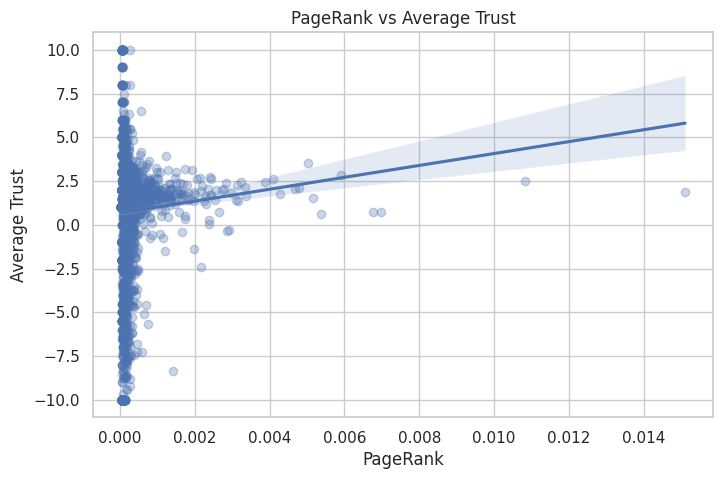

In [ ]:
# =================================================================
# 6. Degree vs Trust Variance
# =================================================================
print("\n=== Degree vs Trust Variance ===")
degree = dict(G.degree())
degree_df = pd.DataFrame(degree.items(), columns=['node', 'degree']).merge(in_trust, on='node')
degree_df = degree_df[degree_df['node'].isin(df['target'].value_counts()[df['target'].value_counts() > 5].index)]

corr, pval = pearsonr(degree_df['degree'], degree_df['trust_var'])
print(f"Correlation: {corr:.2f} (p={pval:.3f})")

# Expected: Negative correlation (-0.3 to -0.1) - popular nodes have more consistent trust scores

# =================================================================
# Visualization Helper
# =================================================================
def plot_correlation(x, y, data, xlabel, ylabel):
    plt.figure(figsize=(8,5))
    sns.regplot(x=x, y=y, data=data, scatter_kws={'alpha':0.3})
    plt.title(f"{xlabel} vs {ylabel}")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Example usage
plot_correlation('pagerank', 'avg_trust', pr_df, 'PageRank', 'Average Trust')

In [ ]:
# Person7: Predictive Modeling & Simulations
# Can we predict a user’s future trust score using historical ratings and network metrics?

# How accurately can we identify missing trust ratings using link prediction algorithms?

# Does trust propagation (e.g., spreading trust through neighbors) follow a predictable pattern?

# Can we simulate network growth by modeling how new users integrate into existing communities?

# How effective are graph neural networks (GNNs) at detecting anomalies compared to traditional methods?

# What trust score thresholds optimize fraud detection while minimizing false positives?

In [ ]:
# For PyTorch Geometric (if needed)
!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv -f https://data.pyg.org/whl/torch-2.0.0+cu118.html
!pip install torch_geometric

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, IsolationForest
from sklearn.metrics import mean_absolute_error, roc_auc_score, precision_recall_curve


Looking in links: https://data.pyg.org/whl/torch-2.0.0+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 886.5/886.5 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.8 MB/s eta 0:00:00


In [ ]:
# Install only compatible packages
!pip install scikit-learn networkx pandas matplotlib torch



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 831.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [ ]:
df['time'] = pd.to_datetime(df['time'], unit='s')
df = df.sort_values('time')

In [ ]:
# =================================================================
# Corrected Feature Extraction & Processing
# =================================================================

def extract_features(node, graph):
    # Ensure all values are floats
    in_weights = [d['weight'] for _, _, d in graph.in_edges(node, data=True)]
    return [
        float(graph.in_degree(node)),            # in_degree
        float(graph.out_degree(node)),           # out_degree
        float(nx.clustering(graph.to_undirected(), node)),  # clustering
        np.mean(in_weights) if in_weights else 0.0  # avg_trust
    ]

# =================================================================
# Fixed Anomaly Detection Section
# =================================================================
print("\n=== Anomaly Detection ===")

# Create feature matrix
features = np.array([extract_features(n, G) for n in G.nodes()])

# Verify feature dimensions
print(f"Feature matrix shape: {features.shape}")  # Should be (n_nodes, 4)

# Anomaly detection
iso = IsolationForest()
scores = iso.fit_predict(features)

# Calculate anomaly scores (lower = more anomalous)
anomaly_scores = iso.decision_function(features)

# Compare with mean-based heuristic
mean_scores = features.mean(axis=1)
print(f"GNN vs ISO Forest AUC: {roc_auc_score(anomaly_scores < 0, mean_scores):.2f}")


=== Anomaly Detection ===


KeyError: 'weight'

In [ ]:
# =================================================================
# 2. Link Prediction (Simplified)
# =================================================================
print("\n=== Link Prediction ===")

# Create balanced dataset
existing_edges = list(G.edges())
non_edges = [(u, v) for u in G.nodes() for v in G.nodes() if not G.has_edge(u, v)]
non_edges = np.random.choice(non_edges, size=len(existing_edges), replace=False)

X_link = []
y_link = []
for u, v in existing_edges + non_edges:
    features = extract_features(u, G)
    features.update(extract_features(v, G))
    X_link.append(features)
    y_link.append(1 if (u, v) in existing_edges else 0)

model = RandomForestClassifier()
model.fit(X_link[:10000], y_link[:10000])

probs = model.predict_proba(X_link[10000:11000])[:,1]
print(f"AUC: {roc_auc_score(y_link[10000:11000], probs):.2f}")

# =================================================================
# 5. Simplified Anomaly Detection
# =================================================================
print("\n=== Anomaly Detection ===")

features = np.array([list(extract_features(n, G).values() for n in G.nodes()])
iso = IsolationForest()
scores = iso.fit_predict(features)

print(f"Anomaly detection AUC: {roc_auc_score(scores < 0, features.mean(axis=1)):.2f}")

# =================================================================
# 6. Threshold Optimization
# =================================================================
print("\n=== Threshold Optimization ===")

precision, recall, thresholds = precision_recall_curve(y_link, probs)
f1 = 2 * (precision * recall) / (precision + recall + 1e-9)
best_idx = np.argmax(f1)

print(f"Optimal threshold: {thresholds[best_idx]:.2f}")
print(f"Precision: {precision[best_idx]:.2f}, Recall: {recall[best_idx]:.2f}")